# Custom HELMET Dataloader example

The first part of the DL training loop is the dataloader, and when the data returned is
complex, such as bounding boxes with tracking labels and classes, a custom dataloader
is needed. To use the `HELMETDataLoader` class, import it from `model.dataloader`:

In [1]:
from model.dataloader import HELMETDataLoader

The `__init__` function takes the arguments `(root_dir, shuffle=True, batch_size=4)`, where
 `root_dir` is the path to the HELMET dataset linked in the `readme`, such that at least
 the following files/directories are present:

```
root_dir/
│   data_split.csv
└───image/
└───annotation/
```

In [2]:
dataloader = HELMETDataLoader("./data/HELMET_DATASET", batch_size=4, shuffle=True, resize=True)

An example batch (with bounding boxes drawn on) can be seen here:

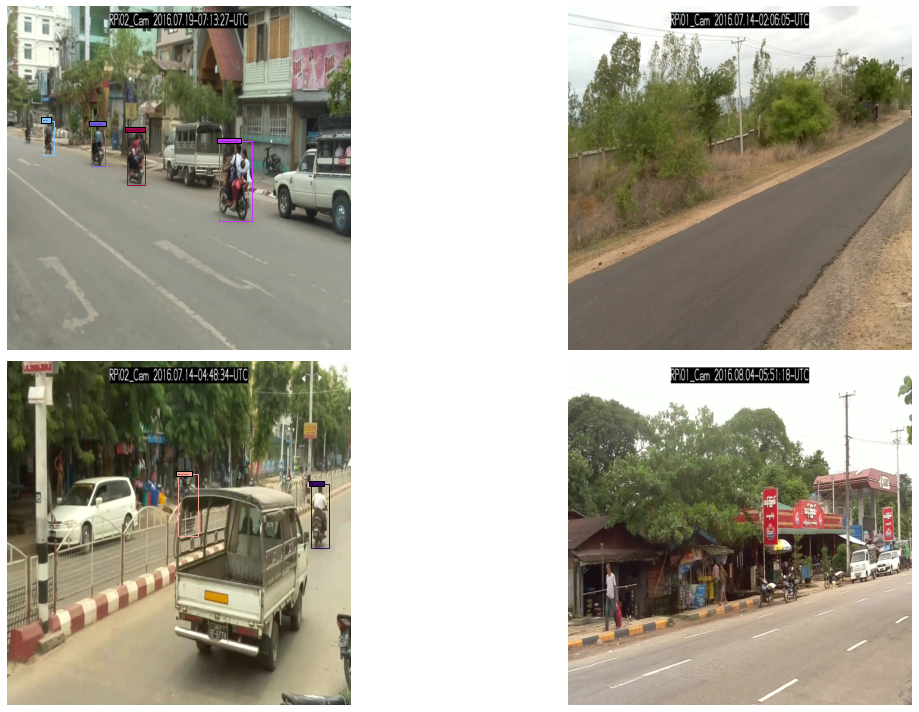

In [4]:
import matplotlib.pyplot as plt
import numpy as np

batch = next(iter(dataloader))
imgs, annotations = batch
fig, axs = plt.subplots(2, 2, figsize=(19,10))

for (x, y), ax in np.ndenumerate(axs):
    img, annotation = imgs[2*x + y], annotations[2*x + y]
    ax.imshow(np.array(img).transpose([1, 2, 0]))
    ax.axis('off')

    for k, v in annotation.items():
        col = tuple(np.random.random(3))
        _, _, x, y, w, h, label = v
        rect = plt.Rectangle((x, y), w, h, fc="none", ec=col)
        ax.add_patch(rect)
        ax.text(x, y, label, fontsize=w /(2.5*len(label)), bbox={'facecolor': col, 'pad': 2})
plt.tight_layout()
plt.show()